In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import prepare as p
import explore as e
import summarize as s

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import linregress
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import TweedieRegressor



%matplotlib inline

In [28]:
df = a.get_heart()
df = p.rename_cols(df)
df = p.replace_cat_values(df)

In [29]:
df_original = pd.read_csv('heart.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      301 non-null    int64  
 1   sex                      301 non-null    object 
 2   chest_pain_type          301 non-null    object 
 3   resting_bp               301 non-null    int64  
 4   cholesterol              301 non-null    int64  
 5   fasting_blood_sugar>120  301 non-null    int64  
 6   rest_ecg                 301 non-null    object 
 7   max_heart_rate           301 non-null    int64  
 8   exercise_induced_angina  301 non-null    int64  
 9   oldpeak                  301 non-null    float64
 10  st_slope                 301 non-null    object 
 11  num_major_blood_vessels  301 non-null    int64  
 12  defect_type              301 non-null    object 
 13  high_risk_of_mi          301 non-null    int64  
 14  exercise_induced_angin   3

((301, 15),
 None,
               age  resting_bp  cholesterol  fasting_blood_sugar>120  \
 count  301.000000  301.000000   301.000000               301.000000   
 mean    54.378738  131.647841   246.504983                 0.146179   
 std      9.110950   17.594002    51.915998                 0.353874   
 min     29.000000   94.000000   126.000000                 0.000000   
 25%     47.000000  120.000000   211.000000                 0.000000   
 50%     56.000000  130.000000   241.000000                 0.000000   
 75%     61.000000  140.000000   275.000000                 0.000000   
 max     77.000000  200.000000   564.000000                 1.000000   
 
        max_heart_rate  exercise_induced_angina     oldpeak  \
 count      301.000000               301.000000  301.000000   
 mean       149.740864                 0.325581    1.043189   
 std         22.891031                 0.469372    1.163384   
 min         71.000000                 0.000000    0.000000   
 25%        134.

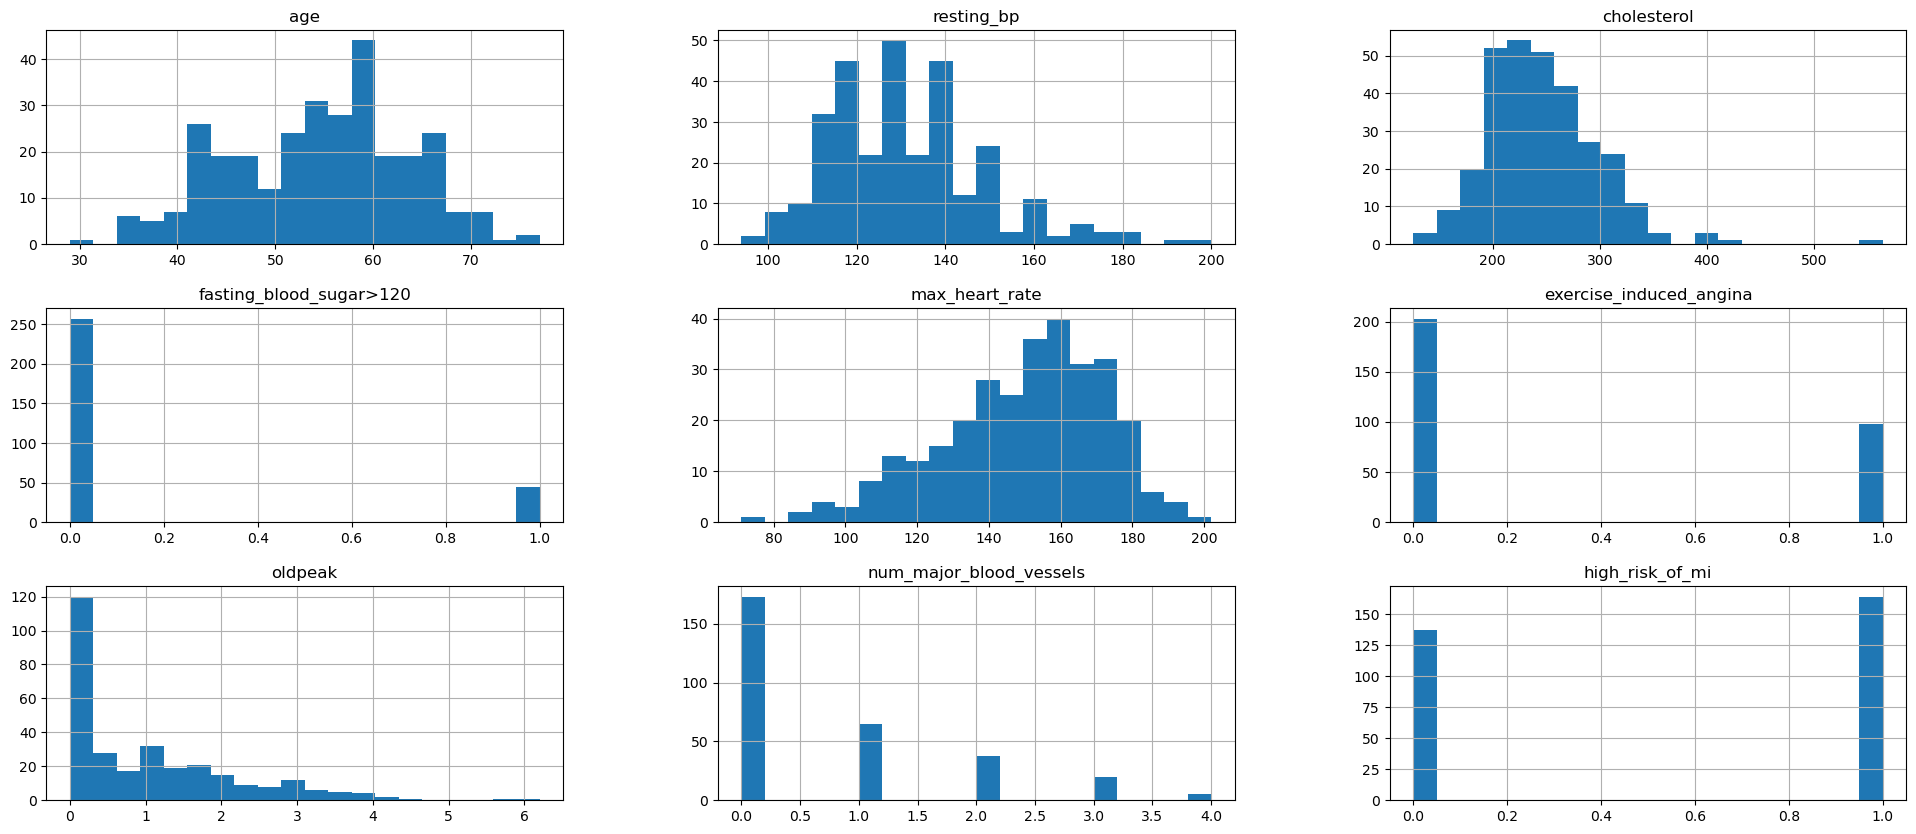

In [30]:
s.summarize(df)

In [31]:
df.shape

(301, 15)

In [32]:
train, val, test =  p.split_data(df, 'defect_type')

In [33]:
train.shape, val.shape, test.shape

((201, 15), (51, 15), (49, 15))

- - -
Beginning more in-depth visual exploration
- - -

Inital Questions:

- Does higher resting blood pressure lead to higher risk of heart attack?
- Does type of chest pain relate to st_slope?
- How strongly is cholesterol correlated with high risk?
- Is oldpeak related to high risk?  What is oldpeak?
- st_slope to high risk

In [34]:
#plot all continuous variables against output

categorical = ['sex', 'chest_pain_type', 'rest_ecg', 
                'exercise_induced_angina', 'st_slope', 
                'defect_type', 'fasting_blood_sugar>120',
                'num_major_blood_vessels']

continuous = []

target = 'high_risk_of_mi'

for col in train.columns:
    if col not in categorical:
        continuous.append(col)

#removing target variable from continuous list
continuous = continuous[:1]


In [35]:
continuous = continuous[:1]

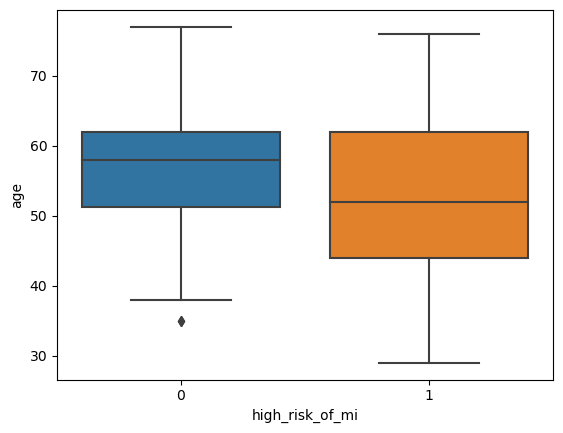

In [36]:
for col in continuous:
    sns.boxplot(data = train, x= target, y= col)
    plt.show()
    

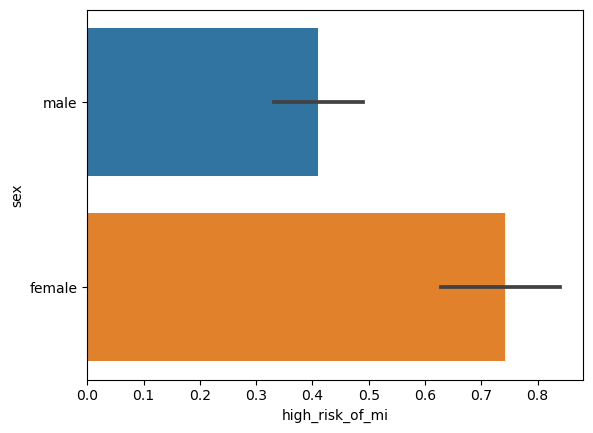

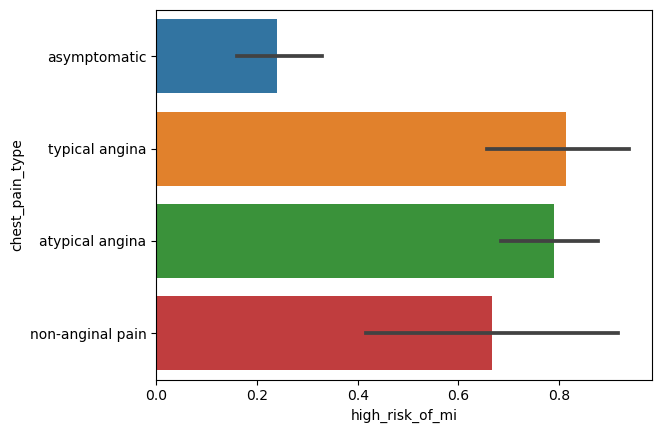

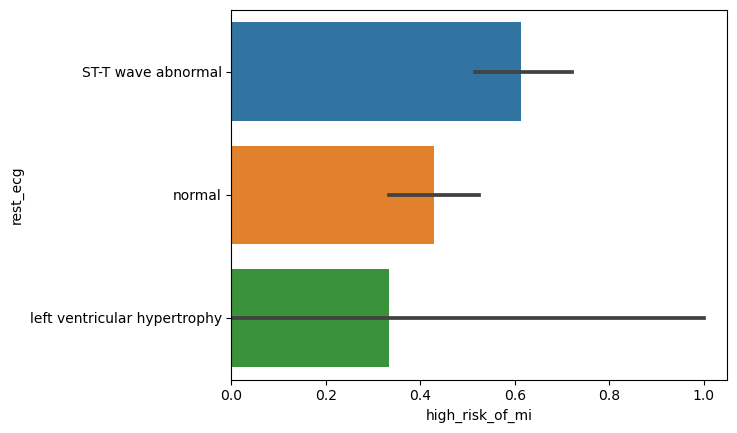

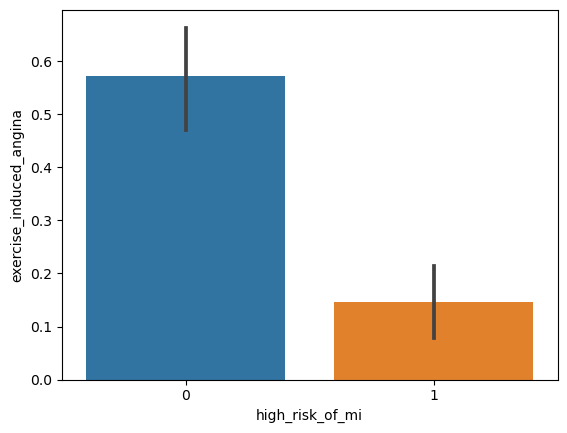

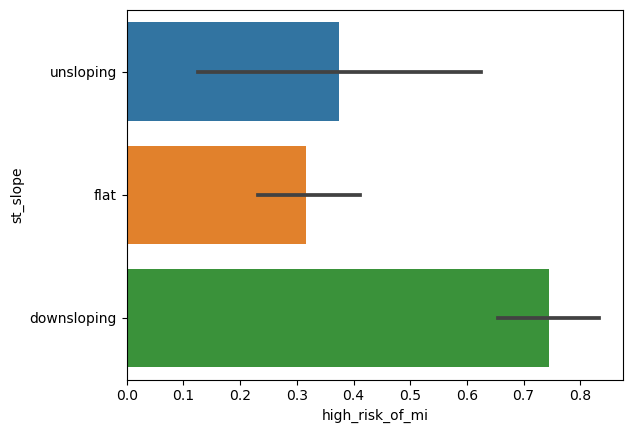

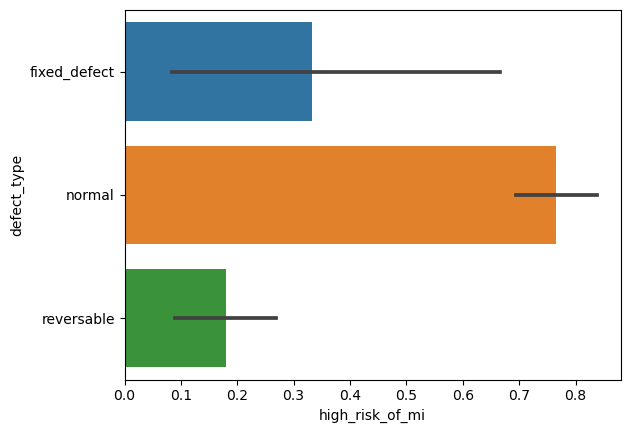

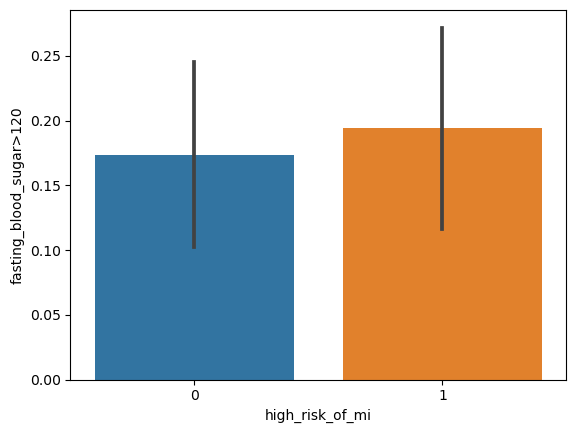

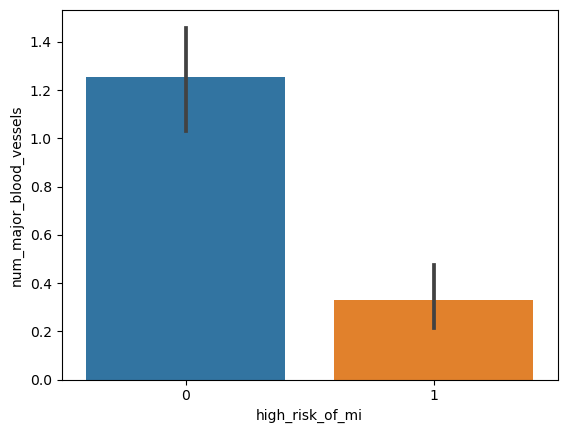

In [37]:
for col in categorical:
    if col not in continuous:
        e.bar_chart(train, 'high_risk_of_mi', col, title= None)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 294 to 181
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      201 non-null    int64  
 1   sex                      201 non-null    object 
 2   chest_pain_type          201 non-null    object 
 3   resting_bp               201 non-null    int64  
 4   cholesterol              201 non-null    int64  
 5   fasting_blood_sugar>120  201 non-null    int64  
 6   rest_ecg                 201 non-null    object 
 7   max_heart_rate           201 non-null    int64  
 8   exercise_induced_angina  201 non-null    int64  
 9   oldpeak                  201 non-null    float64
 10  st_slope                 201 non-null    object 
 11  num_major_blood_vessels  201 non-null    int64  
 12  defect_type              201 non-null    object 
 13  high_risk_of_mi          201 non-null    int64  
 14  exercise_induced_angin  

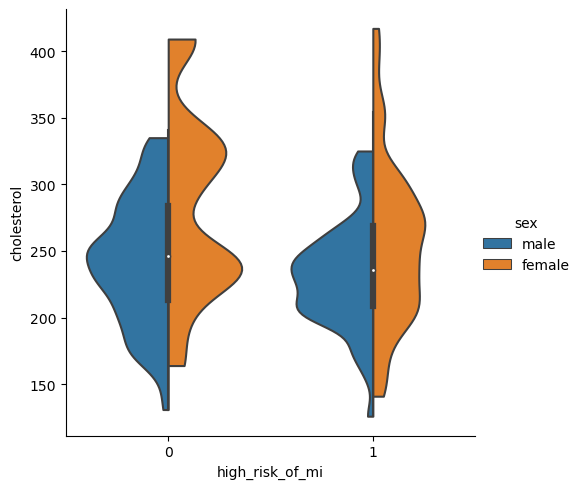

In [39]:
sns.catplot(
    data=train, y= 'cholesterol', x= 'high_risk_of_mi', hue="sex",
    kind="violin", bw=.25, cut=0, split=True,
)

<AxesSubplot:xlabel='high_risk_of_mi', ylabel='cholesterol'>

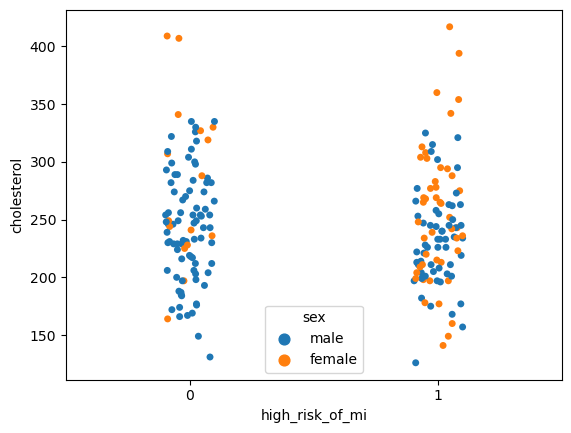

In [40]:
sns.stripplot(data=train, y= 'cholesterol', x= 'high_risk_of_mi', hue="sex")

<AxesSubplot:xlabel='high_risk_of_mi', ylabel='cholesterol'>

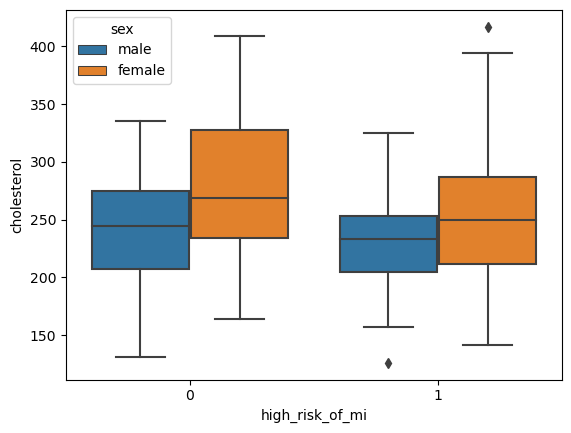

In [41]:
sns.boxplot(data=train, y= 'cholesterol', x= 'high_risk_of_mi', hue="sex")

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cholesterol'>

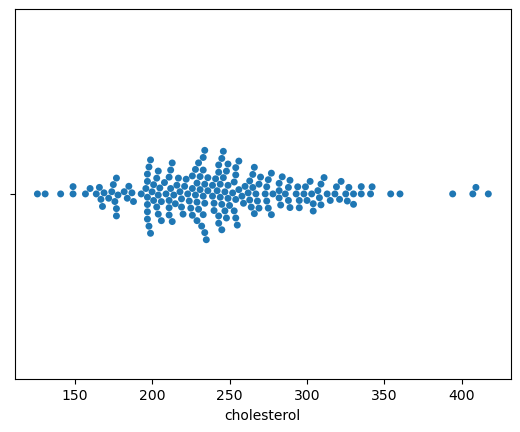

In [42]:
# 1) Does higher resting blood pressure lead to higher risk of heart attack?

# continuous vs discrete

sns.swarmplot(train['cholesterol'], hue= train['age'])

<AxesSubplot:xlabel='max_heart_rate', ylabel='cholesterol'>

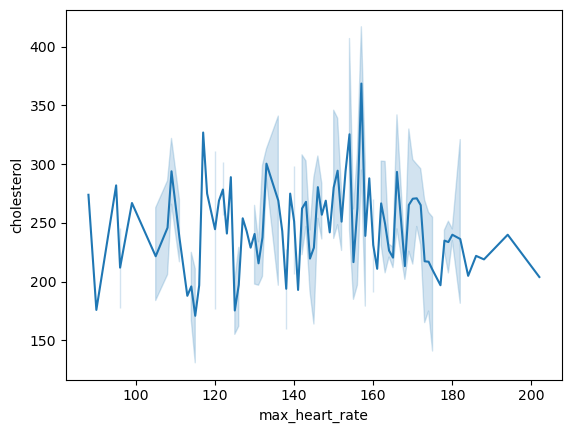

In [43]:
sns.lineplot(x=train['max_heart_rate'], y=train['cholesterol'])

<AxesSubplot:xlabel='num_major_blood_vessels', ylabel='max_heart_rate'>

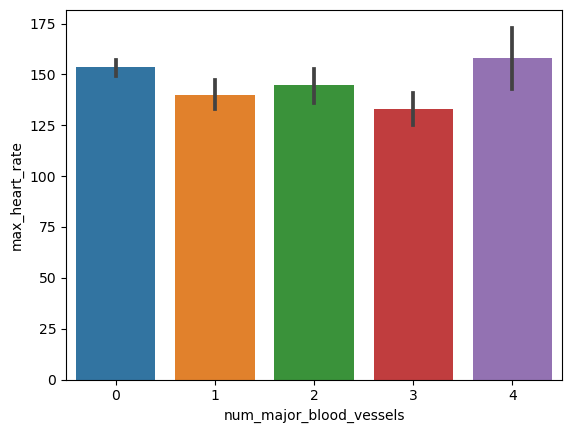

In [44]:
sns.barplot(x=train['num_major_blood_vessels'], y=train['max_heart_rate'])

<AxesSubplot:xlabel='rest_ecg', ylabel='max_heart_rate'>

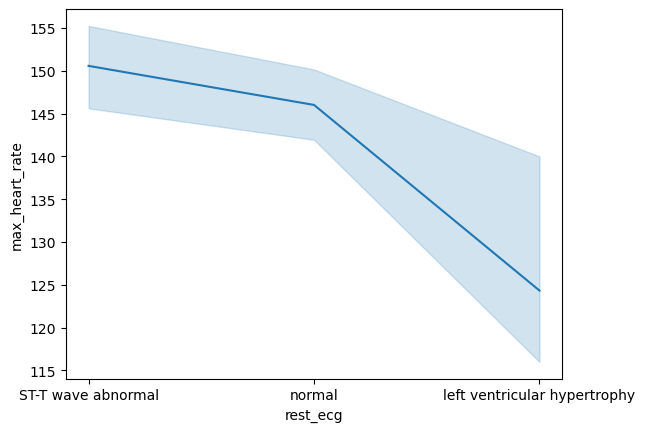

In [45]:
sns.lineplot(x=train['rest_ecg'], y=train['max_heart_rate'])

- - -
- - -
- - -

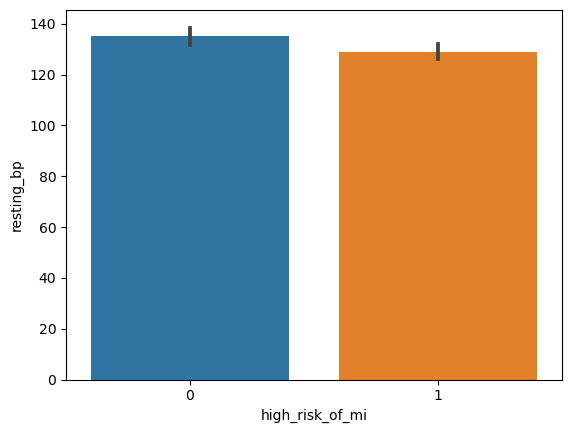

In [46]:
#1) Does higher resting blood pressure lead to higher risk of heart attack?

e.bar_chart(train, 'high_risk_of_mi', 'resting_bp', title = None)



In [47]:
#one sample t test


<AxesSubplot:xlabel='chest_pain_type', ylabel='st_slope'>

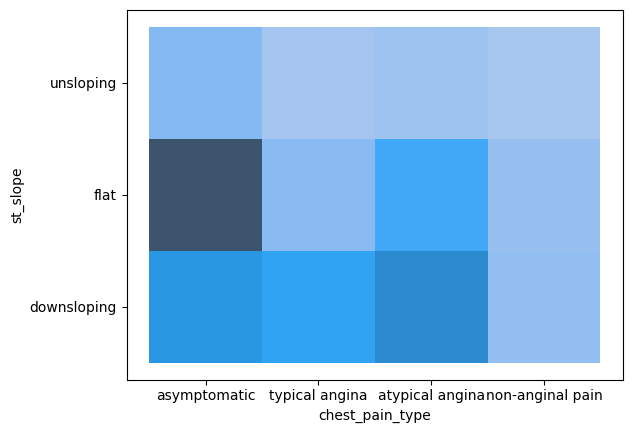

In [48]:
#2) Does type of chest pain relate to st_slope?

sns.histplot(train, x= train.chest_pain_type, y= train.st_slope)

# looks like downsloping has the most typical and atypical angina

In [49]:
observed = pd.crosstab(train.high_risk_of_mi, train.st_slope)
chi2, p, degf, expected = stats.chi2_contingency(observed)


Ho = There is no correlation of slope type with higher risk
Ha = There is a correlation

In [50]:
e.chi_square_test(train.high_risk_of_mi, train.st_slope)

Reject the null hypothesis


(35.30331541405525, 2.157657272270056e-08)

- - -

<AxesSubplot:xlabel='high_risk_of_mi', ylabel='st_slope'>

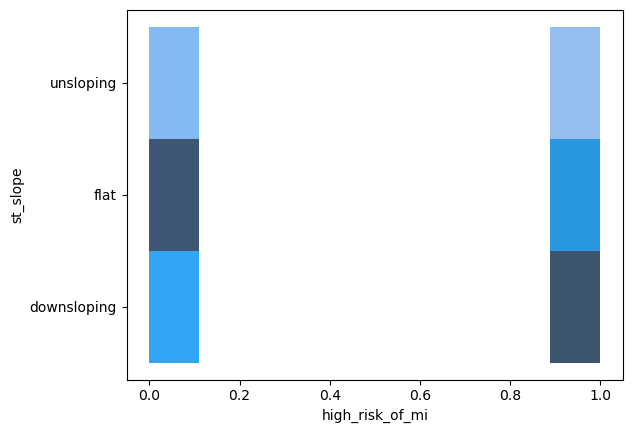

In [51]:
#5) st_slope to high risk

sns.histplot(train, x= train.high_risk_of_mi, y= train.st_slope)
#again, downsloping st_slop causes highest risk

<AxesSubplot:xlabel='high_risk_of_mi', ylabel='chest_pain_type'>

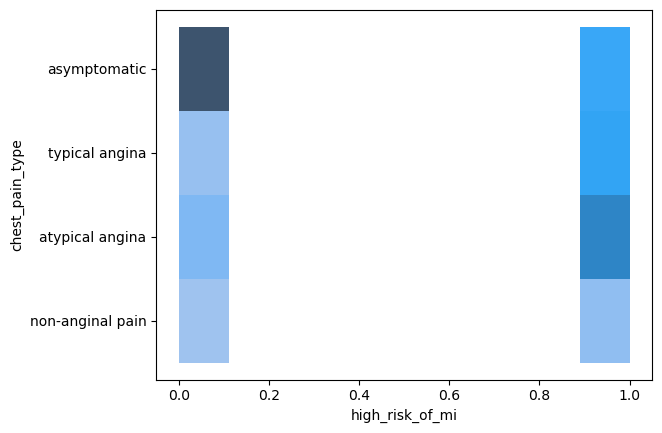

In [52]:
sns.histplot(train, x= train.high_risk_of_mi, y= train.chest_pain_type)
#unsurprisingly absence of chest pain heavy correlation with low risk
#atypical angina strongest correlation with high risk

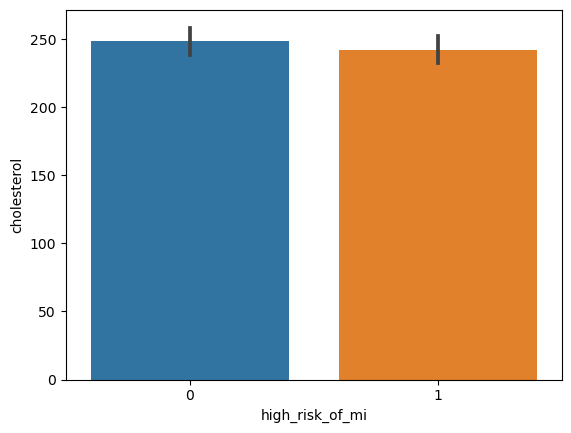

<AxesSubplot:xlabel='high_risk_of_mi', ylabel='cholesterol'>

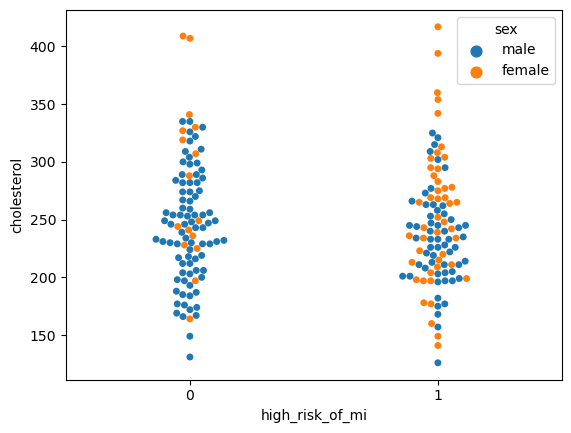

In [53]:
#3) How strongly is cholesterol correlated with high risk?

e.bar_chart(train, 'high_risk_of_mi', 'cholesterol', title= None)

train.high_risk_of_mi = train.high_risk_of_mi.astype(int)
sns.swarmplot(data= train, x= train['high_risk_of_mi'], y= train['cholesterol'], hue= train['sex'])

<AxesSubplot:xlabel='high_risk_of_mi', ylabel='cholesterol'>

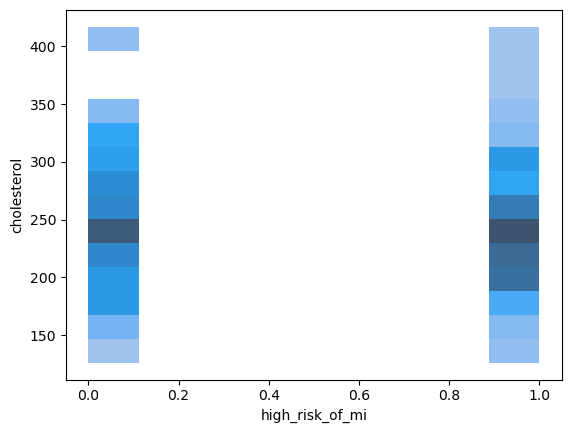

In [56]:
sns.histplot(train, x= train.high_risk_of_mi, y= train.cholesterol)

In [60]:
#one sample 
sample = train[train.high_risk_of_mi == 1].cholesterol
overall_mean = train.cholesterol.mean()

stats.ttest_1samp(sample, overall_mean)

#reject the null
# in this dataset of 301 observations there is no significance.  That could be due to a small
# sample size compared.  Would want to test again with a much larger sample


Ttest_1sampResult(statistic=-0.6480637488148505, pvalue=0.5183998964768946)

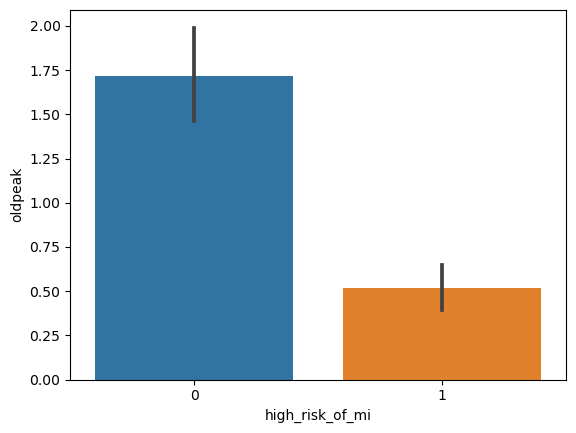

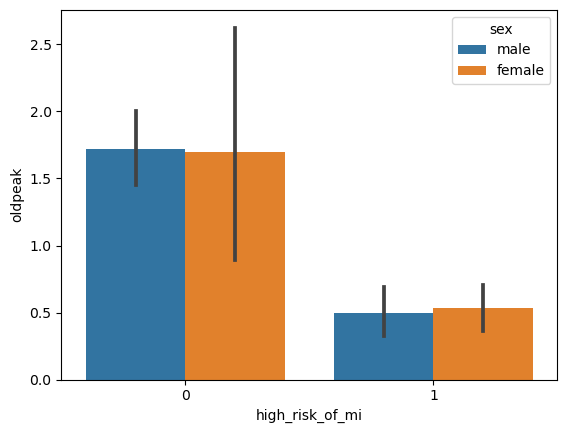

<AxesSubplot:xlabel='high_risk_of_mi', ylabel='oldpeak'>

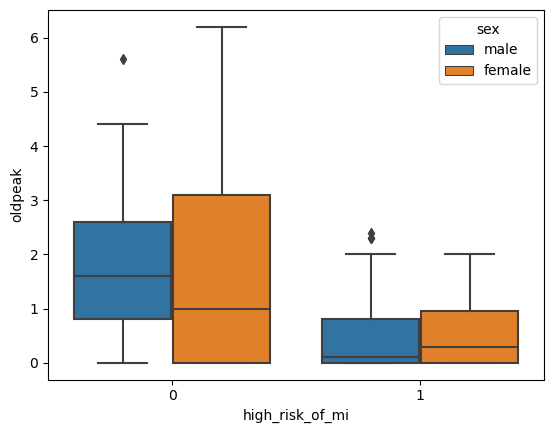

In [55]:
#4) Is oldpeak related to high risk?  What is oldpeak?

e.bar_chart(train, 'high_risk_of_mi', 'oldpeak', title= None)

sns.barplot(data= train, x=train.high_risk_of_mi, y= train.oldpeak, hue= train.sex)
plt.show()

sns.boxplot(data= train, x=train.high_risk_of_mi, y= train.oldpeak, hue= train.sex)

